In [11]:
import numpy as np
from scipy.io import loadmat
from scipy.signal import filtfilt, freqz
import matplotlib.pyplot as plt

# Reading the ECG data from file
data = loadmat("a01m.mat")
signal = data['val'][0]

In [12]:
processed_signal = signal - np.mean(signal)

# Initializing parameters
fs = 200
t = np.arange(len(signal)) / fs
N = len(signal)
k = np.arange(N)
F = k * fs / N

# FIR Notch Filter Design
f0 = 60
w1 = 2 * np.pi * (f0 / fs)

z1 = [np.exp(1j * w1), np.exp(-1j * w1)]
b_notch = np.poly(z1)
a_notch = np.poly([0, 0])  # Denominator coefficients

# Powerline noise removal using a notch filter
filtered_signal = filtfilt(b_notch, a_notch, processed_signal)

# Magnitude spectrum of the filter
w, h = freqz(b_notch, a_notch, worN=1024, fs=fs)

# Filtered ECG signal
filtered_ecg = filtfilt(b_notch, a_notch, filtered_signal)
processed_filtered_signal = filtered_ecg - np.mean(filtered_ecg)


Text(0.5, 1.0, 'Original ECG Signal in Time Domain')

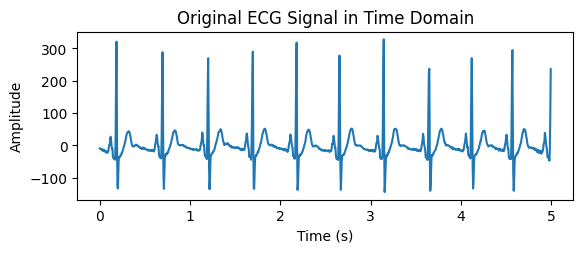

In [13]:
# Plots
# Question 1
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, processed_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original ECG Signal in Time Domain')

Text(0, 0.5, 'Magnitude')

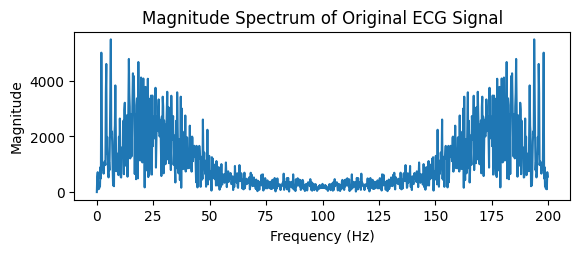

In [14]:
plt.subplot(2, 1, 2)
plt.plot(F, np.abs(np.fft.fft(processed_signal)))
plt.title('Magnitude Spectrum of Original ECG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

Text(0, 0.5, 'Magnitude')

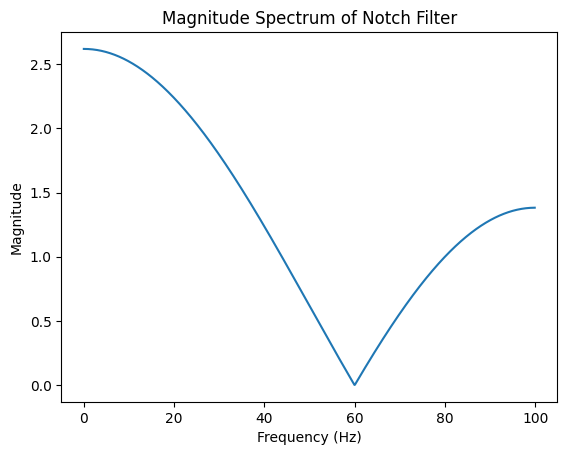

In [15]:
# Question 2
plt.figure()
plt.plot(w, np.abs(h))
plt.title('Magnitude Spectrum of Notch Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

Text(0.5, 1.0, 'Pole-Zero Plot of Notch FIR Filter')

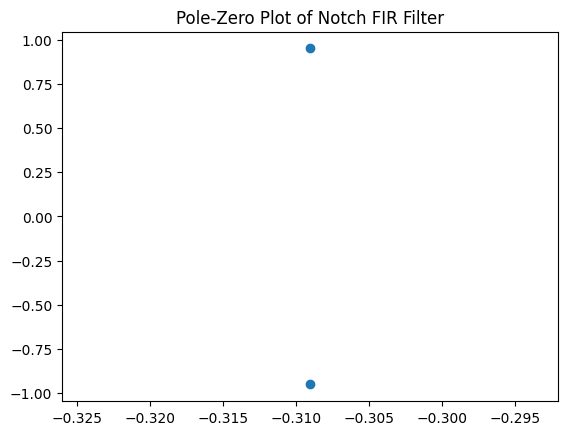

In [16]:
# Question 3
plt.figure()
plt.plot(np.real(z1), np.imag(z1), 'o')
plt.title('Pole-Zero Plot of Notch FIR Filter')

Text(0.5, 1.0, 'Filtered ECG Signal in Time Domain')

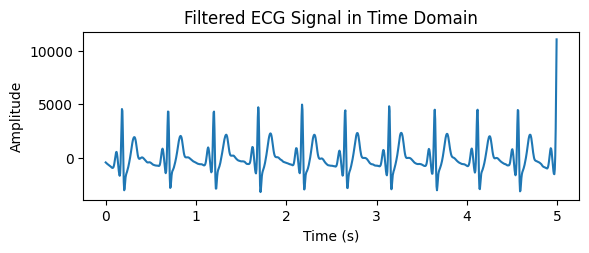

In [17]:
# Question 4
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, processed_filtered_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Filtered ECG Signal in Time Domain')

Text(0, 0.5, 'Magnitude')

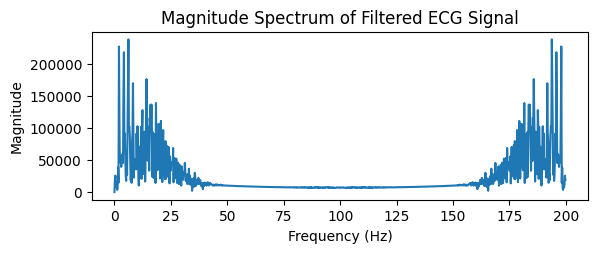

In [18]:
plt.subplot(2, 1, 2)
plt.plot(F, np.abs(np.fft.fft(processed_filtered_signal)))
plt.title('Magnitude Spectrum of Filtered ECG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')